# Breast cancer Wisconsin diagnostic data set - via Kaggle:

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data



#### Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34]. 


Attribute Information:

=>  Diagnosis (M = malignant, B = benign))

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter) 
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry 
* fractal dimension ("coastline approximation" - 1)

#### Limitations: super small data set!

In [1]:
import pandas as pd

In [2]:
initial_data = pd.read_csv('data.csv')

In [3]:
initial_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1. Working on the initial data set

* Removing 'ID' column.

In [4]:
initial_data.drop(initial_data.columns[0], axis=1, inplace=True)

In [5]:
initial_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


* 'Diagnosis' columns input needs to be binary/dummy. Malignant: 1, Benign: 0.

In [6]:
initial_data['diagnosis']=initial_data['diagnosis'].map({'M':1,'B':0})

In [7]:
initial_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
col_labels = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean','fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
              'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst',
             ]
initial_data.columns = col_labels

* Looking for missing values.

In [9]:
for c in col_labels:
    no_missing = initial_data[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
    else:
        print(c)
        print("No missing values")
        print(' ')

diagnosis
No missing values
 
radius_mean
No missing values
 
texture_mean
No missing values
 
perimeter_mean
No missing values
 
area_mean
No missing values
 
smoothness_mean
No missing values
 
compactness_mean
No missing values
 
concavity_mean
No missing values
 
concave_points_mean
No missing values
 
symmetry_mean
No missing values
 
fractal_dimension_mean
No missing values
 
radius_se
No missing values
 
texture_se
No missing values
 
perimeter_se
No missing values
 
area_se
No missing values
 
smoothness_se
No missing values
 
compactness_se
No missing values
 
concavity_se
No missing values
 
concave points_se
No missing values
 
symmetry_se
No missing values
 
fractal_dimension_se
No missing values
 
radius_worst
No missing values
 
texture_worst
No missing values
 
perimeter_worst
No missing values
 
area_worst
No missing values
 
smoothness_worst
No missing values
 
compactness_worst
No missing values
 
concavity_worst
No missing values
 
concave points_worst
No missing val

* Verify class distribution.

#### Set is not perfectly balanced, however the differene in class distribution is not that significant to apply solutions dedicated for highly imbalanced cases.

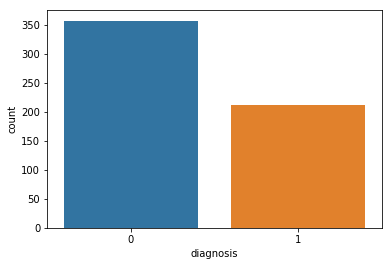

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(initial_data['diagnosis'],label="Sum")

plt.show()

# 2. Correlation

Via Kaggle: 'The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.'


What it means is that the same features are described in three different manners - using more than one version of such feature wolud lead to autocorrelation. Therefore, the first heatmap is generated for solely informative purpose - depicts correlation between all 30 descriptors. 

The data set will be divided into three separate subsets - containing mean-, se- and worst-features respectively. Another heatmaps for the subsets will be generated to visualize potential autocorrelation between descriptors.

In [11]:
import numpy as np

correlation = initial_data.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


* One of the data set's hallmarks is relatively high correlation coefficient score - dividing the set into subsets may not completely eliminate risk of autocorrelation, score 0.5-0.6 will be considered acceptable.
* Correlation not necceserily means causation, that is why features will not be exluded only for their low correlation with diagnosis.

# Features_mean

In [12]:
data_mean = initial_data[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean','fractal_dimension_mean']]

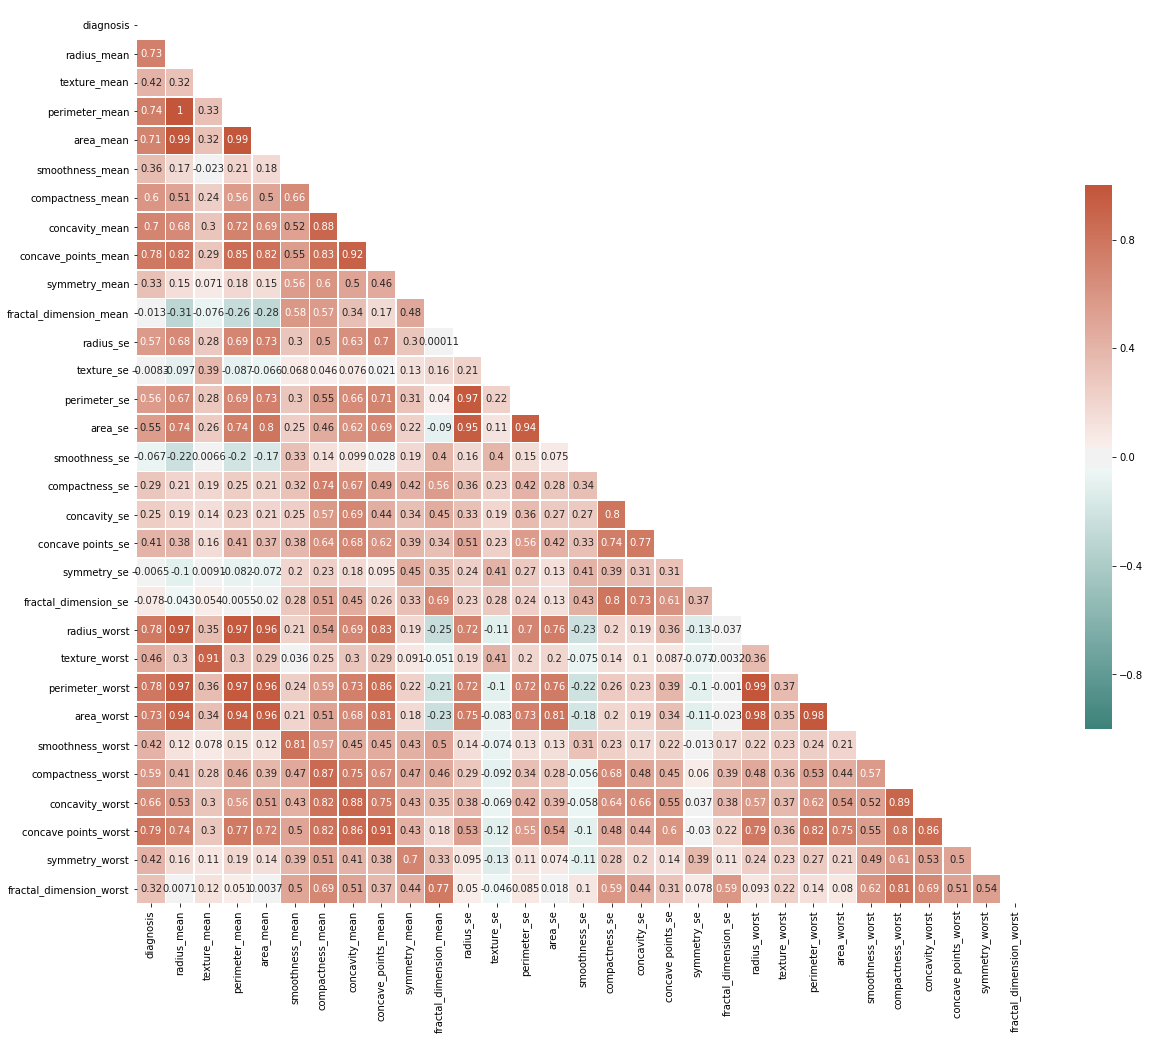

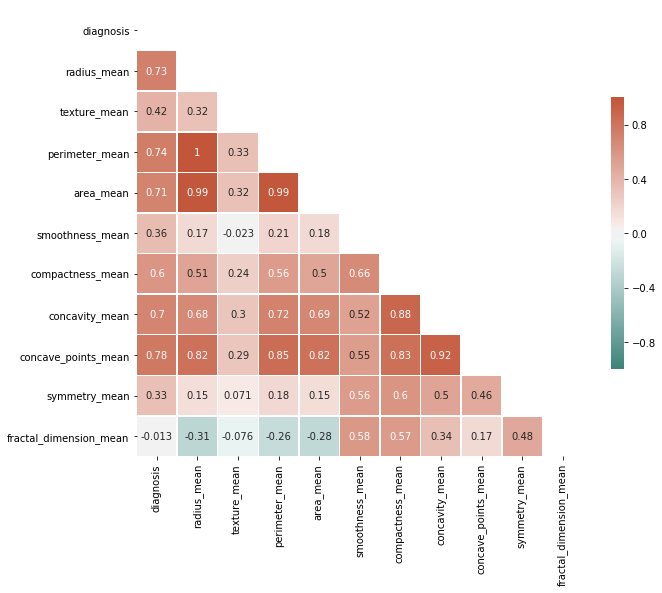

In [13]:
correlation = data_mean.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [14]:
data_mean_cut = initial_data[['diagnosis', 'texture_mean', 'smoothness_mean', 'concave_points_mean', 'symmetry_mean','fractal_dimension_mean']]

### Descriptors chosen for futher analysis:

* Diagnosis


* Texture
* Smoothness
* Concave points
* Symmetry
* Fractal dimension

In [15]:
#data_mean.head()

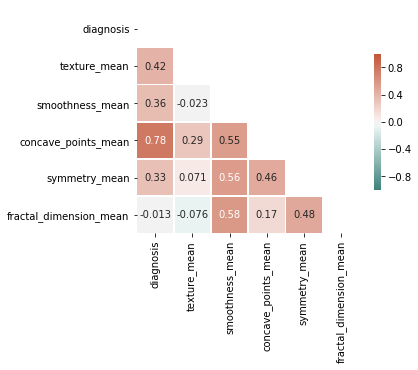

In [16]:
correlation = data_mean_cut.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

# Features_se

In [17]:
data_se = initial_data[['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']]

In [18]:
#data_se.head()

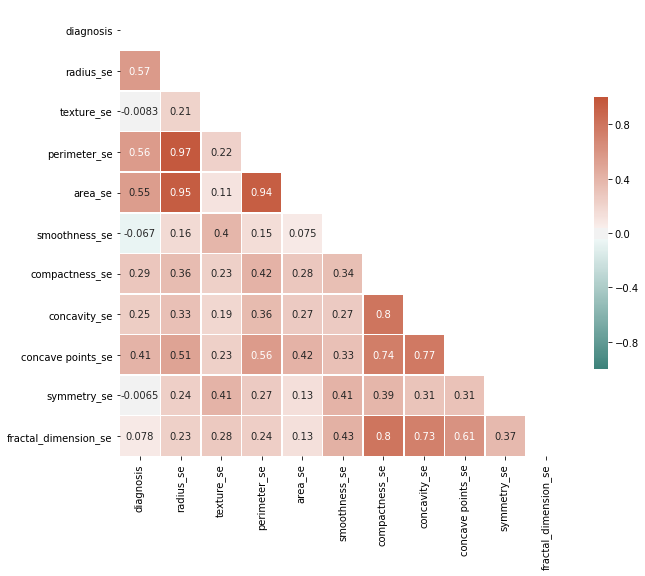

In [19]:
correlation = data_se.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [20]:
data_se_cut = initial_data[['diagnosis', 'texture_se', 'perimeter_se', 'smoothness_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']]

## Descriptors chosen for futher analysis:

* Diagnosis


* Texture
* Perimeter
* Smoothness
* Concave points
* Symmetry
* Fractal dimension

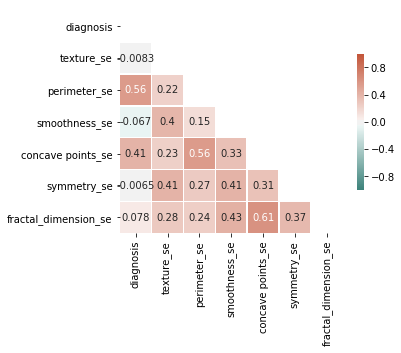

In [21]:
correlation = data_se_cut.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

# Features_worst

In [22]:
data_worst = initial_data[['diagnosis','radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst']]

In [23]:
#data_worst.head()

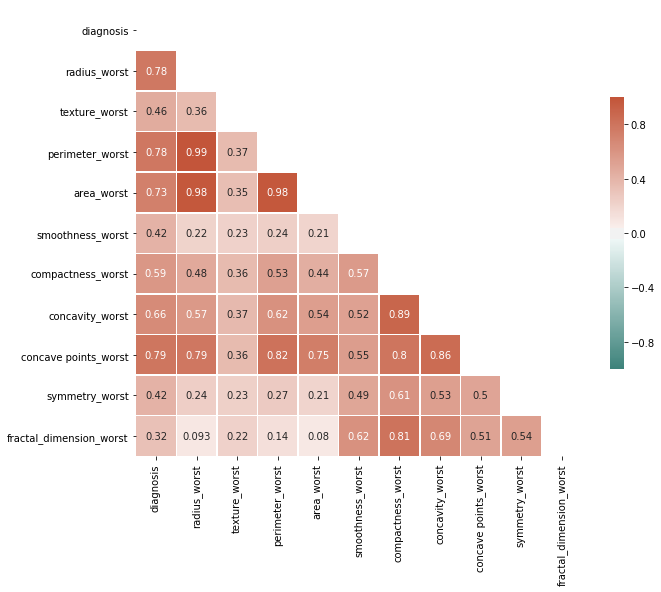

In [24]:
correlation = data_worst.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [25]:
data_worst_cut=initial_data[['diagnosis', 'texture_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst','fractal_dimension_worst']]

## Descriptors chosen for futher analysis:

* Diagnosis


* Texture
* Smoothness
* Concavity
* Symmetry
* Fractal dimension

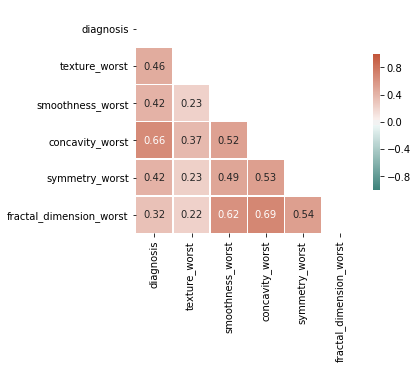

In [26]:
correlation = data_worst_cut.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

### Features to be included in mean, standard error and worst-result models respectively:

| MEAN             | ST ERROR         | WORST            |
|------------------|------------------|------------------|
|texture           |texture           |texture           |
|------------------|------------------|------------------|
|smoothness        |perimeter         |smoothness        |
|------------------|------------------|------------------|
|concave points    |smoothness        |concavity         |
|------------------|------------------|------------------|
|symmetry          |concave_points    |symmetry          |
|------------------|------------------|------------------|
|fractal dimension |symmetry          |fractal dimension |
|------------------|------------------|------------------|
|                  |fractal dimension |                  |
|------------------|------------------|------------------|

# 3. Classifiers comparison

#### Classifiers:

* K-means - via IBM: 'it is unlikely that binary data can be clustered satisfactorily'; still, the K-means classifier what chosen on purpose to simply verify how bad will work in comparison to others.


* Logistic Regression
* Decision Tree
* Support Vector Machine
* Linear Discriminant Analysis
* Quadratic Discriminant Analysis
* Random Forest
* K-Nearest Neighbors
* Naive Bayes

#### What's next:

* precision score
* recall score
* F1 score
* support score
* accuracy score
* AUC/ROC
* mean squared error

### Libraries:

In [27]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

# Features - means - algorithm comparison

In [28]:
X = data_mean_cut[['texture_mean', 'smoothness_mean', 'concave_points_mean', 'symmetry_mean','fractal_dimension_mean']]
y = data_mean_cut[['diagnosis']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

#### K-means

In [30]:
k_means = KMeans(n_clusters=2)
fitting = k_means.fit(X_train, y_train)

pred = np.round(k_means.predict(X_test))

k_means_precision, k_means_recall, k_means_f1score, k_means_support = score(y_test, pred, average='binary')
k_means_accuracy = accuracy_score(y_test, pred)
k_means_auc = 'not applicable'
k_means_error = mse(y_test, pred)

#### Logistic Regression

In [31]:
LR = LogisticRegression()
fitting = LR.fit(X_train, y_train.values.ravel())

pred = np.round(LR.predict(X_test))  
prob = LR.predict_proba(X_test)[:,1]

LR_precision, LR_recall, LR_f1score, LR_support = score(y_test, pred, average='binary')
LR_accuracy = accuracy_score(y_test, pred)
LR_auc = roc_auc_score(y_test, prob)
LR_error = mse(y_test, pred)

#### Decision Tree

In [32]:
decision_tree = DecisionTreeClassifier()
fitting = decision_tree.fit(X_train, y_train)

pred = np.round(decision_tree.predict(X_test))  
prob = decision_tree.predict_proba(X_test)[:,1]

decision_tree_precision, decision_tree_recall, decision_tree_f1score, decision_tree_support = score(y_test, pred, average='binary')
decision_tree_accuracy = accuracy_score(y_test, pred)
decision_tree_auc = roc_auc_score(y_test, prob)
decision_tree_error = mse(y_test, pred)

#### Support Vector Machine

In [33]:
SVM = SVC(probability = True)
fitting = SVM.fit(X_train, y_train)

pred = np.round(SVM.predict(X_test))  
prob = SVM.predict_proba(X_test)[:,1]

SVM_precision, SVM_recall, SVM_f1score, SVM_support = score(y_test, pred, average='binary')
SVM_accuracy = accuracy_score(y_test, pred)
SVM_auc = roc_auc_score(y_test, prob)
SVM_error = mse(y_test, pred)

/root/anaconda3/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Linear Discriminant Analysis

In [34]:
LDA = LinearDiscriminantAnalysis()
fitting = LDA.fit(X_train, y_train)

pred = np.round(LDA.predict(X_test))  
prob = LDA.predict_proba(X_test)[:,1]

LDA_precision, LDA_recall, LDA_f1score, LDA_support = score(y_test, pred, average='binary')
LDA_accuracy = accuracy_score(y_test, pred)
LDA_auc = roc_auc_score(y_test, prob)
LDA_error = mse(y_test, pred)

#### Quadratic Discriminant Analysis

In [35]:
QDA = QuadraticDiscriminantAnalysis()
fitting = QDA.fit(X_train, y_train)

pred = np.round(QDA.predict(X_test))  
prob = QDA.predict_proba(X_test)[:,1]

QDA_precision, QDA_recall, QDA_f1score, QDA_support = score(y_test, pred, average='binary')
QDA_accuracy = accuracy_score(y_test, pred)
QDA_auc = roc_auc_score(y_test, prob)
QDA_error = mse(y_test, pred)

#### Random Forest Classifier

In [36]:
random_forest = RandomForestClassifier()
fitting = random_forest.fit(X_train, y_train.values.ravel())

pred = np.round(random_forest.predict(X_test))  
prob = random_forest.predict_proba(X_test)[:,1]

random_forest_precision, random_forest_recall, random_forest_f1score, random_forest_support = score(y_test, pred, average='binary')
random_forest_accuracy = accuracy_score(y_test, pred)
random_forest_auc = roc_auc_score(y_test, prob)
random_forest_error = mse(y_test, pred)

#### K-Nearest Neighbors

In [37]:
KNN = KNeighborsClassifier()
fitting = KNN.fit(X_train, y_train.values.ravel())

pred = np.round(KNN.predict(X_test))  
prob = KNN.predict_proba(X_test)[:,1]

KNN_precision, KNN_recall, KNN_f1score, KNN_support = score(y_test, pred, average='binary')
KNN_accuracy = accuracy_score(y_test, pred)
KNN_auc = roc_auc_score(y_test, prob)
KNN_error = mse(y_test, pred)

#### Naive Bayes

In [38]:
bayes = GaussianNB()
fitting = bayes.fit(X_train, y_train.values.ravel())

pred = np.round(bayes.predict(X_test))  
prob = bayes.predict_proba(X_test)[:,1]

bayes_precision, bayes_recall, bayes_f1score, bayes_support = score(y_test, pred, average='binary')
bayes_accuracy = accuracy_score(y_test, pred)
bayes_auc = roc_auc_score(y_test, prob)
bayes_error = mse(y_test, pred)

## Comparison

In [39]:
models_mean = pd.DataFrame({
    'Model'    : ['KMeans', 'Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Accuracy' : [k_means_accuracy, LR_accuracy, decision_tree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, random_forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision': [k_means_precision, LR_precision, decision_tree_precision, SVM_precision, LDA_precision, QDA_precision, random_forest_precision, KNN_precision, bayes_precision],
    'Recall'   : [k_means_recall, LR_recall, decision_tree_recall, SVM_recall, LDA_recall, QDA_recall, random_forest_recall, KNN_recall, bayes_recall],
    'F1_score'       : [k_means_f1score, LR_f1score, decision_tree_f1score, SVM_f1score, LDA_f1score, QDA_f1score, random_forest_f1score, KNN_f1score, bayes_f1score],
    'Support'  : [k_means_support, LR_support, decision_tree_support, SVM_support, LDA_support, QDA_support, random_forest_support, KNN_support, bayes_support],
    'AUC_ROC'  : [k_means_auc, LR_auc, decision_tree_auc, SVM_auc, LDA_auc, QDA_auc, random_forest_auc, KNN_auc, bayes_auc],
    'Mean2 error'  : [k_means_error, LR_error, decision_tree_error, SVM_error, LDA_error, QDA_error, random_forest_error, KNN_error, bayes_error]
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'Support', 'AUC_ROC', 'Mean2 error'])

models_mean.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,Support,AUC_ROC,Mean2 error
5,Quadratic Discriminant Analysis,0.958763,0.953846,0.925373,0.939394,None,0.981314,0.041237
4,Linear Discriminant Analysis,0.948454,0.983051,0.865672,0.920635,None,0.981431,0.051546
6,Random Forest,0.922680,0.882353,0.895522,0.888889,None,0.965977,0.077320
8,Bayes,0.896907,0.821918,0.895522,0.857143,None,0.953461,0.103093
2,Decision Tree,0.881443,0.789474,0.895522,0.839161,None,0.884769,0.118557
1,Logistic Regression,0.778351,0.714286,0.597015,0.650407,None,0.84534,0.221649
3,Support Vector Machine,0.731959,0.584270,0.776119,0.666667,None,0.85486,0.268041
7,K-Nearest Neighbors,0.721649,0.584416,0.671642,0.625000,None,0.763721,0.278351
0,KMeans,0.278351,0.165138,0.268657,0.204545,None,not applicable,0.721649


# Features - standard error - algorithm comparison

In [40]:
X = data_se_cut[['texture_se', 'perimeter_se', 'smoothness_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']] 
y = data_se_cut[['diagnosis']] 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

#### K-means

In [42]:
k_means = KMeans(n_clusters=2)
fitting = k_means.fit(X_train, y_train)

pred = np.round(k_means.predict(X_test))

k_means_precision, k_means_recall, k_means_f1score, k_means_support = score(y_test, pred, average='binary')
k_means_accuracy = accuracy_score(y_test, pred)
k_means_auc = 'not applicable'
k_means_error = mse(y_test, pred)

#### Logistic Regression

In [43]:
LR = LogisticRegression()
fitting = LR.fit(X_train, y_train)

pred = np.round(LR.predict(X_test))  
prob = LR.predict_proba(X_test)[:,1]

LR_precision, LR_recall, LR_f1score, LR_support = score(y_test, pred, average='binary')
LR_accuracy = accuracy_score(y_test, pred)
LR_auc = roc_auc_score(y_test, prob)
LR_error = mse(y_test, pred)

#### Decision Tree

In [44]:
decision_tree = DecisionTreeClassifier()
fitting = decision_tree.fit(X_train, y_train)

pred = np.round(decision_tree.predict(X_test))  
prob = decision_tree.predict_proba(X_test)[:,1]

decision_tree_precision, decision_tree_recall, decision_tree_f1score, decision_tree_support = score(y_test, pred, average='binary')
decision_tree_accuracy = accuracy_score(y_test, pred)
decision_tree_auc = roc_auc_score(y_test, prob)
decision_tree_error = mse(y_test, pred)

#### Support Vector Machine

In [45]:
SVM = SVC(probability = True)
fitting = SVM.fit(X_train, y_train)

pred = np.round(SVM.predict(X_test))  
prob = SVM.predict_proba(X_test)[:,1]

SVM_precision, SVM_recall, SVM_f1score, SVM_support = score(y_test, pred, average='binary')
SVM_accuracy = accuracy_score(y_test, pred)
SVM_auc = roc_auc_score(y_test, prob)
SVM_error = mse(y_test, pred)

#### Linear Discriminant Analysis

In [46]:
LDA = LinearDiscriminantAnalysis()
fitting = LDA.fit(X_train, y_train)

pred = np.round(LDA.predict(X_test))  
prob = LDA.predict_proba(X_test)[:,1]

LDA_precision, LDA_recall, LDA_f1score, LDA_support = score(y_test, pred, average='binary')
LDA_accuracy = accuracy_score(y_test, pred)
LDA_auc = roc_auc_score(y_test, prob)
LDA_error = mse(y_test, pred)

#### Quadratic Discriminant Analysis

In [47]:
QDA = QuadraticDiscriminantAnalysis()
fitting = QDA.fit(X_train, y_train)

pred = np.round(QDA.predict(X_test))  
prob = QDA.predict_proba(X_test)[:,1]

QDA_precision, QDA_recall, QDA_f1score, QDA_support = score(y_test, pred, average='binary')
QDA_accuracy = accuracy_score(y_test, pred)
QDA_auc = roc_auc_score(y_test, prob)
QDA_error = mse(y_test, pred)

#### Random Forest Classifier

In [48]:
random_forest = RandomForestClassifier()
fitting = random_forest.fit(X_train, y_train.values.ravel())

pred = np.round(random_forest.predict(X_test))  
prob = random_forest.predict_proba(X_test)[:,1]

random_forest_precision, random_forest_recall, random_forest_f1score, random_forest_support = score(y_test, pred, average='binary')
random_forest_accuracy = accuracy_score(y_test, pred)
random_forest_auc = roc_auc_score(y_test, prob)
random_forest = mse(y_test, pred)

#### K-Nearest Neighbors

In [49]:
KNN = KNeighborsClassifier()
fitting = KNN.fit(X_train, y_train.values.ravel())

pred = np.round(KNN.predict(X_test))  
prob = KNN.predict_proba(X_test)[:,1]

KNN_precision, KNN_recall, KNN_f1score, KNN_support = score(y_test, pred, average='binary')
KNN_accuracy = accuracy_score(y_test, pred)
KNN_auc = roc_auc_score(y_test, prob)
KNN_error = mse(y_test, pred)

#### Naive Bayes

In [50]:
bayes = GaussianNB()
fitting = bayes.fit(X_train, y_train.values.ravel())

pred = np.round(bayes.predict(X_test))  
prob = bayes.predict_proba(X_test)[:,1]

bayes_precision, bayes_recall, bayes_f1score, bayes_support = score(y_test, pred, average='binary')
bayes_accuracy = accuracy_score(y_test, pred)
bayes_auc = roc_auc_score(y_test, prob)
bayes_error = mse(y_test, pred)

## Comparison

In [51]:
models_se = pd.DataFrame({
    'Model'    : ['KMeans', 'Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Accuracy' : [k_means_accuracy, LR_accuracy, decision_tree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, random_forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision': [k_means_precision, LR_precision, decision_tree_precision, SVM_precision, LDA_precision, QDA_precision, random_forest_precision, KNN_precision, bayes_precision],
    'Recall'   : [k_means_recall, LR_recall, decision_tree_recall, SVM_recall, LDA_recall, QDA_recall, random_forest_recall, KNN_recall, bayes_recall],
    'F1_score'       : [k_means_f1score, LR_f1score, decision_tree_f1score, SVM_f1score, LDA_f1score, QDA_f1score, random_forest_f1score, KNN_f1score, bayes_f1score],
    'Support'  : [k_means_support, LR_support, decision_tree_support, SVM_support, LDA_support, QDA_support, random_forest_support, KNN_support, bayes_support],
    'AUC_ROC'  : [k_means_auc, LR_auc, decision_tree_auc, SVM_auc, LDA_auc, QDA_auc, random_forest_auc, KNN_auc, bayes_auc],
    'Mean2 error'  : [k_means_error, LR_error, decision_tree_error, SVM_error, LDA_error, QDA_error, random_forest_error, KNN_error, bayes_error]
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'Support', 'AUC_ROC', 'Mean2 error'])

models_se.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,Support,AUC_ROC,Mean2 error
6,Random Forest,0.855670,0.794118,0.794118,0.794118,None,0.903711,0.077320
8,Bayes,0.835052,0.821429,0.676471,0.741935,None,0.886438,0.164948
4,Linear Discriminant Analysis,0.829897,0.830189,0.647059,0.727273,None,0.920051,0.170103
5,Quadratic Discriminant Analysis,0.829897,0.807018,0.676471,0.736000,None,0.912582,0.170103
3,Support Vector Machine,0.824742,0.793103,0.676471,0.730159,None,0.879318,0.175258
1,Logistic Regression,0.819588,0.770492,0.691176,0.728682,None,0.897876,0.180412
7,K-Nearest Neighbors,0.819588,0.732394,0.764706,0.748201,None,0.85119,0.180412
2,Decision Tree,0.742268,0.604651,0.764706,0.675325,None,0.747432,0.257732
0,KMeans,0.226804,0.253012,0.617647,0.358974,None,not applicable,0.773196


# Features - worst result - algorithm comparison

In [52]:
X = data_worst_cut[['texture_worst', 'smoothness_worst', 'concavity_worst', 'symmetry_worst','fractal_dimension_worst']]
y = data_worst_cut[['diagnosis']] 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

#### K-means

In [54]:
k_means = KMeans(n_clusters=2)
fitting = k_means.fit(X_train, y_train)

pred = np.round(k_means.predict(X_test))

k_means_precision, k_means_recall, k_means_f1score, k_means_support = score(y_test, pred, average='binary')
k_means_accuracy = accuracy_score(y_test, pred)
k_means_auc = 'not applicable'
k_means_error = mse(y_test, pred)

#### Logistic Regression

In [55]:
LR = LogisticRegression()
fitting = LR.fit(X_train, y_train)

pred = np.round(LR.predict(X_test))  
prob = LR.predict_proba(X_test)[:,1]

LR_precision, LR_recall, LR_f1score, LR_support = score(y_test, pred, average='binary')
LR_accuracy = accuracy_score(y_test, pred)
LR_auc = roc_auc_score(y_test, prob)
LR_error = mse(y_test, pred)

#### Decision Tree

In [56]:
decision_tree = DecisionTreeClassifier()
fitting = decision_tree.fit(X_train, y_train)

pred = np.round(decision_tree.predict(X_test))  
prob = decision_tree.predict_proba(X_test)[:,1]

decision_tree_precision, decision_tree_recall, decision_tree_f1score, decision_tree_support = score(y_test, pred, average='binary')
decision_tree_accuracy = accuracy_score(y_test, pred)
decision_tree_auc = roc_auc_score(y_test, prob)
decision_tree_error = mse(y_test, pred)

#### Support Vector Machine

In [57]:
SVM = SVC(probability = True)
fitting = SVM.fit(X_train, y_train)

pred = np.round(SVM.predict(X_test))  
prob = SVM.predict_proba(X_test)[:,1]

SVM_precision, SVM_recall, SVM_f1score, SVM_support = score(y_test, pred, average='binary')
SVM_accuracy = accuracy_score(y_test, pred)
SVM_auc = roc_auc_score(y_test, prob)
SVM_error = mse(y_test, pred)

#### Linear Discriminant Analysis

In [58]:
LDA = LinearDiscriminantAnalysis()
fitting = LDA.fit(X_train, y_train)

pred = np.round(LDA.predict(X_test))  
prob = LDA.predict_proba(X_test)[:,1]

LDA_precision, LDA_recall, LDA_f1score, LDA_support = score(y_test, pred, average='binary')
LDA_accuracy = accuracy_score(y_test, pred)
LDA_auc = roc_auc_score(y_test, prob)
LDA_error = mse(y_test, pred)

#### Quadratic Discriminant Analysis

In [59]:
QDA = QuadraticDiscriminantAnalysis()
fitting = QDA.fit(X_train, y_train)

pred = np.round(QDA.predict(X_test))  
prob = QDA.predict_proba(X_test)[:,1]

QDA_precision, QDA_recall, QDA_f1score, QDA_support = score(y_test, pred, average='binary')
QDA_accuracy = accuracy_score(y_test, pred)
QDA_auc = roc_auc_score(y_test, prob)
QDA_error = mse(y_test, pred)

#### Random Forest Classifier

In [60]:
random_forest = RandomForestClassifier()
fitting = random_forest.fit(X_train, y_train.values.ravel())

pred = np.round(random_forest.predict(X_test))  
prob = random_forest.predict_proba(X_test)[:,1]

random_forest_precision, random_forest_recall, random_forest_f1score, random_forest_support = score(y_test, pred, average='binary')
random_forest_accuracy = accuracy_score(y_test, pred)
random_forest_auc = roc_auc_score(y_test, prob)
random_forest_error = mse(y_test, pred)

#### K-Nearest Neighbors

In [61]:
KNN = KNeighborsClassifier()
fitting = KNN.fit(X_train, y_train.values.ravel())

pred = np.round(KNN.predict(X_test))  
prob = KNN.predict_proba(X_test)[:,1]

KNN_precision, KNN_recall, KNN_f1score, KNN_support = score(y_test, pred, average='binary')
KNN_accuracy = accuracy_score(y_test, pred)
KNN_auc = roc_auc_score(y_test, prob)
KNN_error = mse(y_test, pred)

#### Naive Bayes

In [62]:
bayes = GaussianNB()
fitting = bayes.fit(X_train, y_train.values.ravel())

pred = np.round(bayes.predict(X_test))  
prob = bayes.predict_proba(X_test)[:,1]

bayes_precision, bayes_recall, bayes_f1score, bayes_support = score(y_test, pred, average='binary')
bayes_accuracy = accuracy_score(y_test, pred)
bayes_auc = roc_auc_score(y_test, prob)
bayes_error = mse(y_test, pred)

## Comparison

In [63]:
models_worst = pd.DataFrame({
    'Model'    : ['KMeans', 'Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Accuracy' : [k_means_accuracy, LR_accuracy, decision_tree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, random_forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision': [k_means_precision, LR_precision, decision_tree_precision, SVM_precision, LDA_precision, QDA_precision, random_forest_precision, KNN_precision, bayes_precision],
    'Recall'   : [k_means_recall, LR_recall, decision_tree_recall, SVM_recall, LDA_recall, QDA_recall, random_forest_recall, KNN_recall, bayes_recall],
    'F1_score'       : [k_means_f1score, LR_f1score, decision_tree_f1score, SVM_f1score, LDA_f1score, QDA_f1score, random_forest_f1score, KNN_f1score, bayes_f1score],
    'Support'  : [k_means_support, LR_support, decision_tree_support, SVM_support, LDA_support, QDA_support, random_forest_support, KNN_support, bayes_support],
    'AUC_ROC'  : [k_means_auc, LR_auc, decision_tree_auc, SVM_auc, LDA_auc, QDA_auc, random_forest_auc, KNN_auc, bayes_auc],
    'Mean2 error'  : [k_means_error, LR_error, decision_tree_error, SVM_error, LDA_error, QDA_error, random_forest_error, KNN_error, bayes_error]
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'Support', 'AUC_ROC', 'Mean2 error'])

models_worst.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,Support,AUC_ROC,Mean2 error
6,Random Forest,0.886598,0.905405,0.817073,0.858974,None,0.945721,0.113402
4,Linear Discriminant Analysis,0.871134,0.925373,0.756098,0.832215,None,0.94926,0.128866
5,Quadratic Discriminant Analysis,0.871134,0.901408,0.780488,0.836601,None,0.944578,0.128866
1,Logistic Regression,0.850515,0.934426,0.695122,0.797203,None,0.927591,0.149485
2,Decision Tree,0.835052,0.797619,0.817073,0.807229,None,0.832644,0.164948
8,Bayes,0.809278,0.835821,0.682927,0.751678,None,0.903092,0.190722
7,K-Nearest Neighbors,0.798969,0.820896,0.670732,0.738255,None,0.837162,0.201031
3,Support Vector Machine,0.721649,0.741379,0.524390,0.614286,None,0.833297,0.278351
0,KMeans,0.690722,0.634146,0.634146,0.634146,None,not applicable,0.309278


# 4. General comparison

In [64]:
model_general = pd.concat([models_mean['Model'], models_mean['Accuracy'], 
                           models_se['Model'],models_se['Accuracy'], 
                           models_worst['Model'], models_worst['Accuracy']]
                          , axis=1)

model_general.columns = ['Model_mean', 'Accuracy_mean', 'Model_se', 'Accuracy_se', 'Model_worst', 'Accuracy_worst']

model_general

,Model_mean,Accuracy_mean,Model_se,Accuracy_se,Model_worst,Accuracy_worst
0,KMeans,0.278351,KMeans,0.226804,KMeans,0.690722
1,Logistic Regression,0.778351,Logistic Regression,0.819588,Logistic Regression,0.850515
2,Decision Tree,0.881443,Decision Tree,0.742268,Decision Tree,0.835052
3,Support Vector Machine,0.731959,Support Vector Machine,0.824742,Support Vector Machine,0.721649
4,Linear Discriminant Analysis,0.948454,Linear Discriminant Analysis,0.829897,Linear Discriminant Analysis,0.871134
5,Quadratic Discriminant Analysis,0.958763,Quadratic Discriminant Analysis,0.829897,Quadratic Discriminant Analysis,0.871134
6,Random Forest,0.922680,Random Forest,0.855670,Random Forest,0.886598
7,K-Nearest Neighbors,0.721649,K-Nearest Neighbors,0.819588,K-Nearest Neighbors,0.798969
8,Bayes,0.896907,Bayes,0.835052,Bayes,0.809278


In [65]:
model_general2 = pd.concat([models_mean['Model'], models_mean['Precision'], 
                           models_se['Model'],models_se['Precision'], 
                           models_worst['Model'], models_worst['Precision']]
                          , axis=1)

model_general2.columns = ['Model_mean', 'Precision_mean', 'Model_se', 'Precision_se', 'Model_worst', 'Precision_worst']

model_general2

,Model_mean,Precision_mean,Model_se,Precision_se,Model_worst,Precision_worst
0,KMeans,0.165138,KMeans,0.253012,KMeans,0.634146
1,Logistic Regression,0.714286,Logistic Regression,0.770492,Logistic Regression,0.934426
2,Decision Tree,0.789474,Decision Tree,0.604651,Decision Tree,0.797619
3,Support Vector Machine,0.584270,Support Vector Machine,0.793103,Support Vector Machine,0.741379
4,Linear Discriminant Analysis,0.983051,Linear Discriminant Analysis,0.830189,Linear Discriminant Analysis,0.925373
5,Quadratic Discriminant Analysis,0.953846,Quadratic Discriminant Analysis,0.807018,Quadratic Discriminant Analysis,0.901408
6,Random Forest,0.882353,Random Forest,0.794118,Random Forest,0.905405
7,K-Nearest Neighbors,0.584416,K-Nearest Neighbors,0.732394,K-Nearest Neighbors,0.820896
8,Bayes,0.821918,Bayes,0.821429,Bayes,0.835821


In [66]:
model_general3 = pd.concat([models_mean['Model'], models_mean['Mean2 error'], 
                           models_se['Model'],models_se['Mean2 error'], 
                           models_worst['Model'], models_worst['Mean2 error']]
                          , axis=1)

model_general3.columns = ['Model_mean', 'Mean2_error_mean', 'Model_se', 'Mean2_error_se', 'Model_worst', 'Mean2_error_worst']

model_general3

,Model_mean,Mean2_error_mean,Model_se,Mean2_error_se,Model_worst,Mean2_error_worst
0,KMeans,0.721649,KMeans,0.773196,KMeans,0.309278
1,Logistic Regression,0.221649,Logistic Regression,0.180412,Logistic Regression,0.149485
2,Decision Tree,0.118557,Decision Tree,0.257732,Decision Tree,0.164948
3,Support Vector Machine,0.268041,Support Vector Machine,0.175258,Support Vector Machine,0.278351
4,Linear Discriminant Analysis,0.051546,Linear Discriminant Analysis,0.170103,Linear Discriminant Analysis,0.128866
5,Quadratic Discriminant Analysis,0.041237,Quadratic Discriminant Analysis,0.170103,Quadratic Discriminant Analysis,0.128866
6,Random Forest,0.077320,Random Forest,0.077320,Random Forest,0.113402
7,K-Nearest Neighbors,0.278351,K-Nearest Neighbors,0.180412,K-Nearest Neighbors,0.201031
8,Bayes,0.103093,Bayes,0.164948,Bayes,0.190722


### Mean:

* highest accuracy: QDA (comparable: LDA)
* lowest accuracy: K-means (significantly lower than other classifiers)

* highest precision: LDA (next QDA)
* lowest precision: K-means (again significantly lower result)

* highest error: K-means (underfitting)
* lowest error: QDA (comparable: LDA; overfitting)

### Standard error:

* highest accuracy: Random forest (next: LDA and QDA)
* lowest accuracy: K-means (significantly lower score)

* highest precision: LDA
* lowest precision: K-means (again)

* highest error: K-means (underfitting)
* lowest error: Random forest (overfitting)

### Worst result:

* highest accuracy: Random forest (next: LDA and QDA)
* lowest accuracy: K-means (suprise - in this case value of the score is not that low (relatively)!)

* highest precision: LDA
* lowest precision: K-means (again not that low)

* highest error: K-means
* lowest error: Random forest


=> next step (to be developed): look for the best combination of featrues in the whole data set (meaning - mixing mean, se and worst_result types of the descriptors still avoiding repeating the same feature)